## Sensory Data

## Preliminary Wrangling

In [1]:
import os
import time
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import dask.dataframe as dd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

from sklearn.metrics import classification_report
# os.getcwd()

In [2]:
# Change work directory
os.chdir("C:\\Users\StephenDiaba\Desktop\DS Challenge\ProjectFiles\Sensor-Data\ExtraSensory.per_uuid_features_labels")

### Combine all 60 records into one dataset

In [3]:
# Load in the dataset into pandas dataframe extracting uuid and combining all to one dataframe
user_file= []
for file in os.listdir('C:\\Users\StephenDiaba\Desktop\DS Challenge\ProjectFiles\Sensor-Data\ExtraSensory.per_uuid_features_labels'):
    df = pd.read_csv(file)
    df['UUID'] = file.split('.')[0]
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    user_file.append(df)
df_combined = pd.concat(user_file)
df_combined = pd.concat(user_file)
df_combined.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

### Exploratory Data Analysis

In [4]:
# data shape
df_combined.shape

(377346, 279)

In [5]:
# check column datatypes
df_combined.dtypes

UUID                                                                        object
timestamp                                                                    int64
raw_acc:magnitude_stats:mean                                               float64
raw_acc:magnitude_stats:std                                                float64
raw_acc:magnitude_stats:moment3                                            float64
raw_acc:magnitude_stats:moment4                                            float64
raw_acc:magnitude_stats:percentile25                                       float64
raw_acc:magnitude_stats:percentile50                                       float64
raw_acc:magnitude_stats:percentile75                                       float64
raw_acc:magnitude_stats:value_entropy                                      float64
raw_acc:magnitude_stats:time_entropy                                       float64
raw_acc:magnitude_spectrum:log_energy_band0                                float64
raw_

In [6]:
# descriptive stats
df_combined.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [7]:
df_combined.shape

(377346, 279)

In [8]:
# check for all null values
df_combined.isnull().sum()

UUID                                                                            0
timestamp                                                                       0
raw_acc:magnitude_stats:mean                                                  290
raw_acc:magnitude_stats:std                                                   290
raw_acc:magnitude_stats:moment3                                               290
raw_acc:magnitude_stats:moment4                                               290
raw_acc:magnitude_stats:percentile25                                          290
raw_acc:magnitude_stats:percentile50                                          290
raw_acc:magnitude_stats:percentile75                                          290
raw_acc:magnitude_stats:value_entropy                                         290
raw_acc:magnitude_stats:time_entropy                                          290
raw_acc:magnitude_spectrum:log_energy_band0                                   290
raw_acc:magnitud

In [9]:
# Convert timestamp to datetime.
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'], unit='s')

In [10]:
#Check for duplicated rows
df_combined.duplicated().sum()

0

In [11]:
df_combined.groupby(['UUID']).count()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

### Main Features of interest 

In [12]:
#df of all columns
features= df_combined.iloc[:,2:227]
features.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch

In [13]:
#df of context labels
labels = df_combined.iloc[:,227:-1]
labels.head()

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
1,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
2,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
3,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
4,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN


### Correlation between context labels for all user

In [14]:
corr = labels.corr().sort_values(by=list(labels.columns), ascending=False)
corr.dropna(how="all")

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.644035,-0.200473,-0.061715,-0.149215,0.849026,-0.238593,-0.173984,-0.110020,-0.320202,0.247623,-0.267511,-0.133555,-0.070861,-0.165944,-0.101200,0.446101,-0.079845,-0.293911,-0.123196,-0.104460,-0.079460,-0.072633,-0.102456,-0.074459,-0.117364,-0.065601,-0.066982,-0.091420,-0.150219,-0.108883,-0.101339,-0.065643,-0.083545,-0.249300,-0.298180,-0.158212,-0.078124,-0.091957,-0.075824,-0.122599,-0.063532,-0.062132,-0.036950,-0.270874,-0.303907,-0.105083,-0.193742,0.341163,-0.163903,-0.203533
label:SLEEPING,0.849026,-0.537308,-0.174910,-0.046576,-0.137838,1.000000,-0.212981,-0.147159,-0.101193,-0.288053,0.219199,-0.237858,-0.121346,-0.060386,-0.153607,-0.087964,0.383691,-0.071885,-0.274936,-0.118923,-0.084553,-0.071789,-0.078371,-0.093318,-0.066814,-0.102642,-0.052442,-0.059191,-0.174603,-0.198077,-0.107308,-0.094946,-0.067096,-0.065959,-0.221564,-0.280666,-0.157224,-0.068494,-0.081876,-0.064672,-0.107248,-0.056070,-0.054693,-0.034480,-0.240444,-0.251799,-0.144259,-0.178777,0.345643,-0.147016,-0.193663
label:LOC_home,0.446101,-0.248191,-0.190338,-0.067557,-0.156071,0.383691,-0.276108,-0.247362,-0.131113,-0.332207,0.404326,-0.453520,-0.163557,-0.088350,-0.201784,-0.120367,1.000000,-0.114949,-0.311248,-0.141517,0.095934,-0.101192,-0.133017,-0.020967,0.058992,0.055223,0.068089,0.079733,0.101872,0.069931,-0.098303,-0.122400,-0.093734,-0.059972,-0.157354,-0.150383,-0.030310,0.043384,0.091634,0.067221,-0.172526,-0.067511,-0.065764,-0.046861,-0.065369,-0.381526,-0.085504,-0.292565,0.384200,-0.234467,-0.230406
label:PHONE_ON_TABLE,0.341163,0.025191,-0.381414,-0.023693,-0.204572,0.345643,-0.289758,-0.169656,-0.003761,0.094415,0.468745,-0.502063,-0.225476,-0.156877,-0.174306,-0.180942,0.384200,-0.084209,-0.703237,-0.170819,-0.027380,-0.146869,-0.217370,0.001808,0.044283,-0.076602,-0.008918,0.015921,0.090491,0.113817,-0.126676,-0.080453,-0.132696,-0.115962,-0.215243,0.186745,-0.033246,-0.027029,0.049339,0.040656,-0.129748,-0.136295,-0.133026,-0.088063,-0.202424,-0.140694,-0.496508,-0.544868,1.000000,0.013375,-0.168199
label:OR_indoors,0.247623,0.060270,-0.567505,-0.125577,-0.424607,0.219199,0.042982,0.073487,-0.010398,0.022321,1.000000,-1.000000,-0.225424,-0.054364,-0.324308,-0.046926,0.404326,-0.119422,-0.383770,-0.236729,0.043100,-0.216753,-0.461692,0.032574,0.033520,0.042912,0.021235,0.031046,0.072001,0.054229,0.027549,0.028785,-0.208679,-0.244738,-0.196535,0.067233,-0.009793,0.036781,0.038598,0.030839,0.035800,-0.276314,-0.258689,0.014381,-0.012724,-0.081080,-0.149746,-0.312083,0.468745,-0.043364,-0.214699
label:ELEVATOR,-0.036950,-0.052734,0.104196,-0.004326,-0.006916,-0.034480,-0.016216,-0.010578,-0.007268,-0.005424,0.014381,-0.012042,-0.014553,-0.004646,-0.009991,-0.009579,-0.046861,-0.006029,0.069172,-0.006808,-0.007941,-0.006080,-0.004351,-0.003351,-0.006203,-0.009339,-0.004597,-0.004603,-0.014490,-0.021117,-0.005167,NaN,-0.005409,-0.019879,-0.022233,-0.023460,-0.014552,-0.007532,-0.005114,-0.005866,-0.009986,0.199874,0.183040,1.000000,0.056017,0.066584,0.002884,0.090032,-0.088063,-0.0084

### Heatmap of correlation between labels for all test subjects 

In [15]:
corr.style.background_gradient(cmap='coolwarm',axis= None)

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.644035,-0.200473,-0.061715,-0.149215,0.849026,-0.238593,-0.173984,-0.110020,-0.320202,0.247623,-0.267511,-0.133555,-0.070861,-0.165944,-0.101200,0.446101,-0.079845,-0.293911,-0.123196,-0.104460,-0.079460,-0.072633,-0.102456,-0.074459,-0.117364,-0.065601,-0.066982,-0.091420,-0.150219,-0.108883,-0.101339,-0.065643,-0.083545,-0.249300,-0.298180,-0.158212,-0.078124,-0.091957,-0.075824,-0.122599,-0.063532,-0.062132,-0.036950,-0.270874,-0.303907,-0.105083,-0.193742,0.341163,-0.163903,-0.203533
label:SLEEPING,0.849026,-0.537308,-0.174910,-0.046576,-0.137838,1.000000,-0.212981,-0.147159,-0.101193,-0.288053,0.219199,-0.237858,-0.121346,-0.060386,-0.153607,-0.087964,0.383691,-0.071885,-0.274936,-0.118923,-0.084553,-0.071789,-0.078371,-0.093318,-0.066814,-0.102642,-0.052442,-0.059191,-0.174603,-0.198077,-0.107308,-0.094946,-0.067096,-0.065959,-0.221564,-0.280666,-0.157224,-0.068494,-0.081876,-0.064672,-0.107248,-0.056070,-0.054693,-0.034480,-0.240444,-0.251799,-0.144259,-0.178777,0.345643,-0.147016,-0.193663
label:LOC_home,0.446101,-0.248191,-0.190338,-0.067557,-0.156071,0.383691,-0.276108,-0.247362,-0.131113,-0.332207,0.404326,-0.453520,-0.163557,-0.088350,-0.201784,-0.120367,1.000000,-0.114949,-0.311248,-0.141517,0.095934,-0.101192,-0.133017,-0.020967,0.058992,0.055223,0.068089,0.079733,0.101872,0.069931,-0.098303,-0.122400,-0.093734,-0.059972,-0.157354,-0.150383,-0.030310,0.043384,0.091634,0.067221,-0.172526,-0.067511,-0.065764,-0.046861,-0.065369,-0.381526,-0.085504,-0.292565,0.384200,-0.234467,-0.230406
label:PHONE_ON_TABLE,0.341163,0.025191,-0.381414,-0.023693,-0.204572,0.345643,-0.289758,-0.169656,-0.003761,0.094415,0.468745,-0.502063,-0.225476,-0.156877,-0.174306,-0.180942,0.384200,-0.084209,-0.703237,-0.170819,-0.027380,-0.146869,-0.217370,0.001808,0.044283,-0.076602,-0.008918,0.015921,0.090491,0.113817,-0.126676,-0.080453,-0.132696,-0.115962,-0.215243,0.186745,-0.033246,-0.027029,0.049339,0.040656,-0.129748,-0.136295,-0.133026,-0.088063,-0.202424,-0.140694,-0.496508,-0.544868,1.000000,0.013375,-0.168199
label:OR_indoors,0.247623,0.060270,-0.567505,-0.125577,-0.424607,0.219199,0.042982,0.073487,-0.010398,0.022321,1.000000,-1.000000,-0.225424,-0.054364,-0.324308,-0.046926,0.404326,-0.119422,-0.383770,-0.236729,0.043100,-0.216753,-0.461692,0.032574,0.033520,0.042912,0.021235,0.031046,0.072001,0.054229,0.027549,0.028785,-0.208679,-0.244738,-0.196535,0.067233,-0.009793,0.036781,0.038598,0.030839,0.035800,-0.276314,-0.258689,0.014381,-0.012724,-0.081080,-0.149746,-0.312083,0.468745,-0.043364,-0.214699
label:ELEVATOR,-0.036950,-0.052734,0.104196,-0.004326,-0.006916,-0.034480,-0.016216,-0.010578,-0.007268,-0.005424,0.014381,-0.012042,-0.014553,-0.004646,-0.009991,-0.009579,-0.046861,-0.006029,0.069172,-0.006808,-0.007941,-0.006080,-0.004351,-0.003351,-0.006203,-0.009339,-0.004597,-0.004603,-0.014490,-0.021117,-0.005167,nan,-0.005409,-0.019879,-0.022233,-0.023460,-0.014552,-0.007532,-0.005114,-0.005866,-0.009986,0.199874,0.183040,1.000000,0.056017,0.066584,0.002884,0.090032,-0.088063,-0.0084

In [16]:
n_examples_per_label = np.sum(labels,axis=0)
labels_and_counts = zip(list(labels.columns),n_examples_per_label)
sorted_labels_and_counts = sorted(labels_and_counts, reverse=True, key=lambda pair:pair[1])
sorted_labels_and_counts

print ("number of examples for every context label:")
i = 0
label_x_arr = []
label_y_arr = []
for (label,count) in sorted_labels_and_counts:
    i = i +1
    label_x_arr.append(label)
    label_y_arr.append(count)
    print (" %i : %s - %d"  % (i,label,count))
    pass;

number of examples for every context label:
 1 : label:OR_indoors - 184692
 2 : label:LOC_home - 152892
 3 : label:SITTING - 136356
 4 : label:PHONE_ON_TABLE - 115037
 5 : label:LYING_DOWN - 104210
 6 : label:SLEEPING - 83055
 7 : label:AT_SCHOOL - 42331
 8 : label:COMPUTER_WORK - 38081
 9 : label:OR_standing - 37782
 10 : label:TALKING - 36293
 11 : label:LOC_main_workplace - 33944
 12 : label:WITH_FRIENDS - 24737
 13 : label:PHONE_IN_POCKET - 23401
 14 : label:FIX_walking - 22136
 15 : label:SURFING_THE_INTERNET - 19416
 16 : label:EATING - 16594
 17 : label:PHONE_IN_HAND - 14573
 18 : label:WATCHING_TV - 13311
 19 : label:OR_outside - 12114
 20 : label:PHONE_IN_BAG - 10201
 21 : label:OR_exercise - 8081
 22 : label:DRIVE_-_I_M_THE_DRIVER - 7975
 23 : label:WITH_CO-WORKERS - 6224
 24 : label:IN_CLASS - 6110
 25 : label:IN_A_CAR - 6083
 26 : label:IN_A_MEETING - 5153
 27 : label:BICYCLING - 5020
 28 : label:COOKING - 4029
 29 : label:LAB_WORK - 3848
 30 : label:CLEANING - 3806
 31 : l

<AxesSubplot:title={'center':'Context label count'}, xlabel='label'>

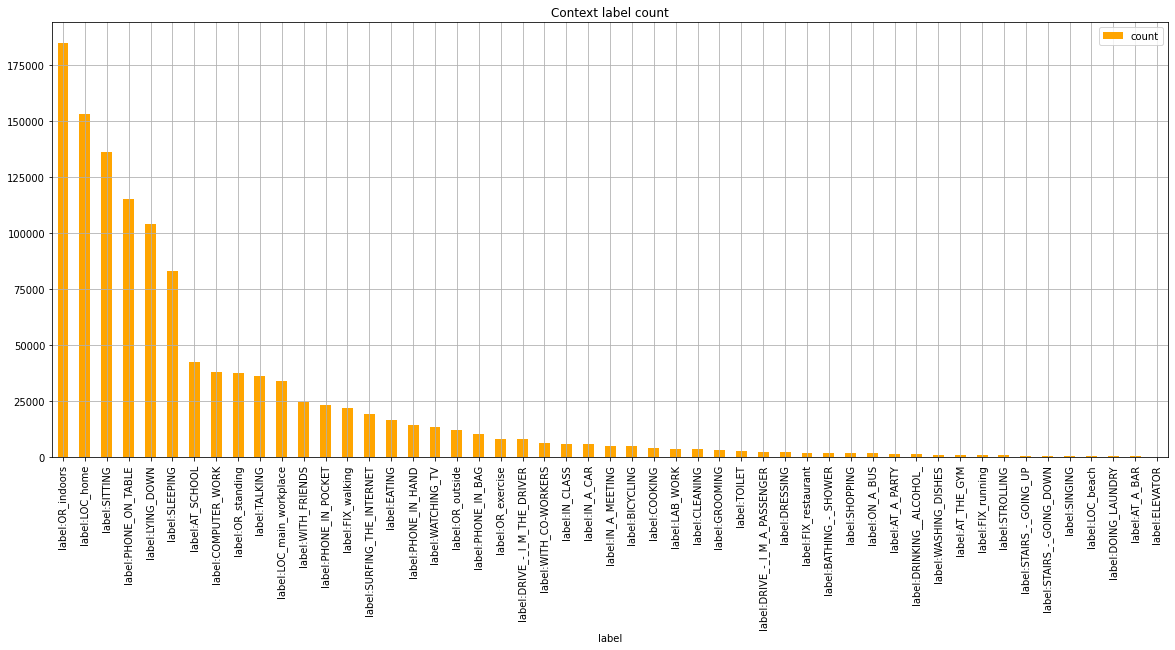

In [17]:
#X.isnull().values.any()
labels_df = pd.DataFrame(sorted_labels_and_counts)
labels_df.rename(columns = {0:'label'}, inplace = True) 
labels_df.rename(columns = {1:'count'}, inplace = True) 
labels_df.plot(x='label', y='count', kind='bar', legend=True, grid=True,color="orange",figsize=(20, 8),title="Context label count")


In [18]:

def project_features_to_selected_sensors(feature_names,sensors_to_use):

    feature_names_arr = []
    for sensor in sensors_to_use:
        if sensor == 'Acc':
            for feature in feature_names:
                #print (type(feature))
                if (feature.startswith('raw_acc')):
                    feature_names_arr.append(feature)
        elif sensor == 'WAcc':
            for feature in feature_names:
                if (feature.startswith('watch_acceleration')):
                    feature_names_arr.append(feature)
        elif sensor == 'Gyro':
            for feature in feature_names:
                if (feature.startswith('proc_gyro')):
                    feature_names_arr.append(feature)
        elif sensor == 'Magnet':
            for feature in feature_names:
                if (feature.startswith('raw_magnet')):
                    feature_names_arr.append(feature)
        elif sensor == 'Compass':
            for feature in feature_names:
                if (feature.startswith('watch_heading')):
                    feature_names_arr.append(feature)
        elif sensor == 'Loc':
            for feature in feature_names:
                if (feature.startswith('location')):
                    feature_names_arr.append(feature)
        elif sensor == 'Aud':
            for feature in feature_names:
                if (feature.startswith('audio_naive')):
                    feature_names_arr.append(feature)
        elif sensor == 'AP':
            for feature in feature_names:
                if (feature.startswith('audio_properties')):
                    feature_names_arr.append(feature)
        elif sensor == 'PS':
            for feature in feature_names:
                if (feature.startswith('discrete')):
                    feature_names_arr.append(feature)
        elif sensor == 'LF':
            for feature in feature_names:
                if (feature.startswith('lf_measurements')):
                    feature_names_arr.append(feature)
                    
    return feature_names_arr

def get_sensor_names_from_features(feature_names):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc';
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro';
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet';
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc';
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass';
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud';
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP';
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS';
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return feat_sensor_names;

In [19]:
feature_names = list(features.columns)
feat_sensor_name = get_sensor_names_from_features(feature_names)
features = features[feature_names]
# features = standardize_features(features,mean_vec,std_vec);
features[np.isnan(features)]=0.


In [20]:
label_names = list(labels.columns)
labels = labels[label_names]
labels[np.isnan(labels)]=0.



In [21]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc'])
features_of_selected_sensors

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'watch_acceleration:magnitude_stats:mean',
 'watch_acceleration:magnitude_stats

### KNN model with "Walking label" Prediction

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features[features_of_selected_sensors], labels['label:FIX_walking'], test_size=0.30, random_state=42)

In [23]:
knn_model= KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred= knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))